# Assignment 3.Exercise 2: Classifyng the BM-Dataset

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,precision_score,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
f = pd.read_csv("dataBM.csv",names=range(3))

In [22]:
X = f.iloc[:,:-1]
y=f[2]

In [23]:
y.value_counts()

0    6195
1    3805
Name: 2, dtype: int64

In [24]:
svm_model = svm.SVC(kernel='rbf')

In [25]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

parameters={'C': Cs, 'gamma' : gammas}

### Two different approach of scoring: 

#### 1. First: I used "scoring=make_scorer(precision_score)" and get result like : 
accuracy = 0.9489, training error = 551.

In [40]:
gs = GridSearchCV(estimator=svm_model, param_grid=parameters,
                  scoring=make_scorer(precision_score), cv=10, n_jobs=3)
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(precision_score), verbose=0)

In [41]:
gs.best_params_

{'C': 0.01, 'gamma': 1}

In [42]:
gs.best_score_

0.9894514808949681

In [43]:
#Actual model object fit with those best parameters Shows default parameters that we did not specify
gs.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Accuracy and Training error for  "scoring = make_scorer(precision_score)"

When we use k-fold cross-validation, we train k models, each one of them leaving the proportion 1/𝑘 of the data out. For each of the models, the train error will be the error on the data selected to train the model.

In [44]:
y_pred = gs.predict(X)

acc = accuracy_score(y, y_pred)
print('accuracy = ', acc)

#If normalize=False, return the number of correctly classified samples.
acc = accuracy_score(y, y_pred, normalize=False) 

error = X.shape[0] - acc

print('training error = ', error)

accuracy =  0.9489
training error =  511


#### 2. Second: I used "scoring='accuracy'" and then get better result like: 
accuracy = 0.99, training error = 66.

In [45]:
#scoring='accuracy'
gs = GridSearchCV(estimator=svm_model, param_grid=parameters,
                  scoring='accuracy', cv=10, n_jobs=3)
gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
gs.best_params_

{'C': 10, 'gamma': 1}

In [47]:
gs.best_score_

0.99

In [48]:
#Actual model object fit with those best parameters Shows default parameters that we did not specify
gs.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Accuracy and Training error for scoring='accuracy'

In [49]:
y_pred = gs.predict(X)

acc = accuracy_score(y, y_pred)
print('accuracy = ', acc)

#If normalize=False, return the number of correctly classified samples.
acc = accuracy_score(y, y_pred, normalize=False) 

error = X.shape[0] - acc

print('training error = ', error)

accuracy =  0.9934
training error =  66


## Decision boundary

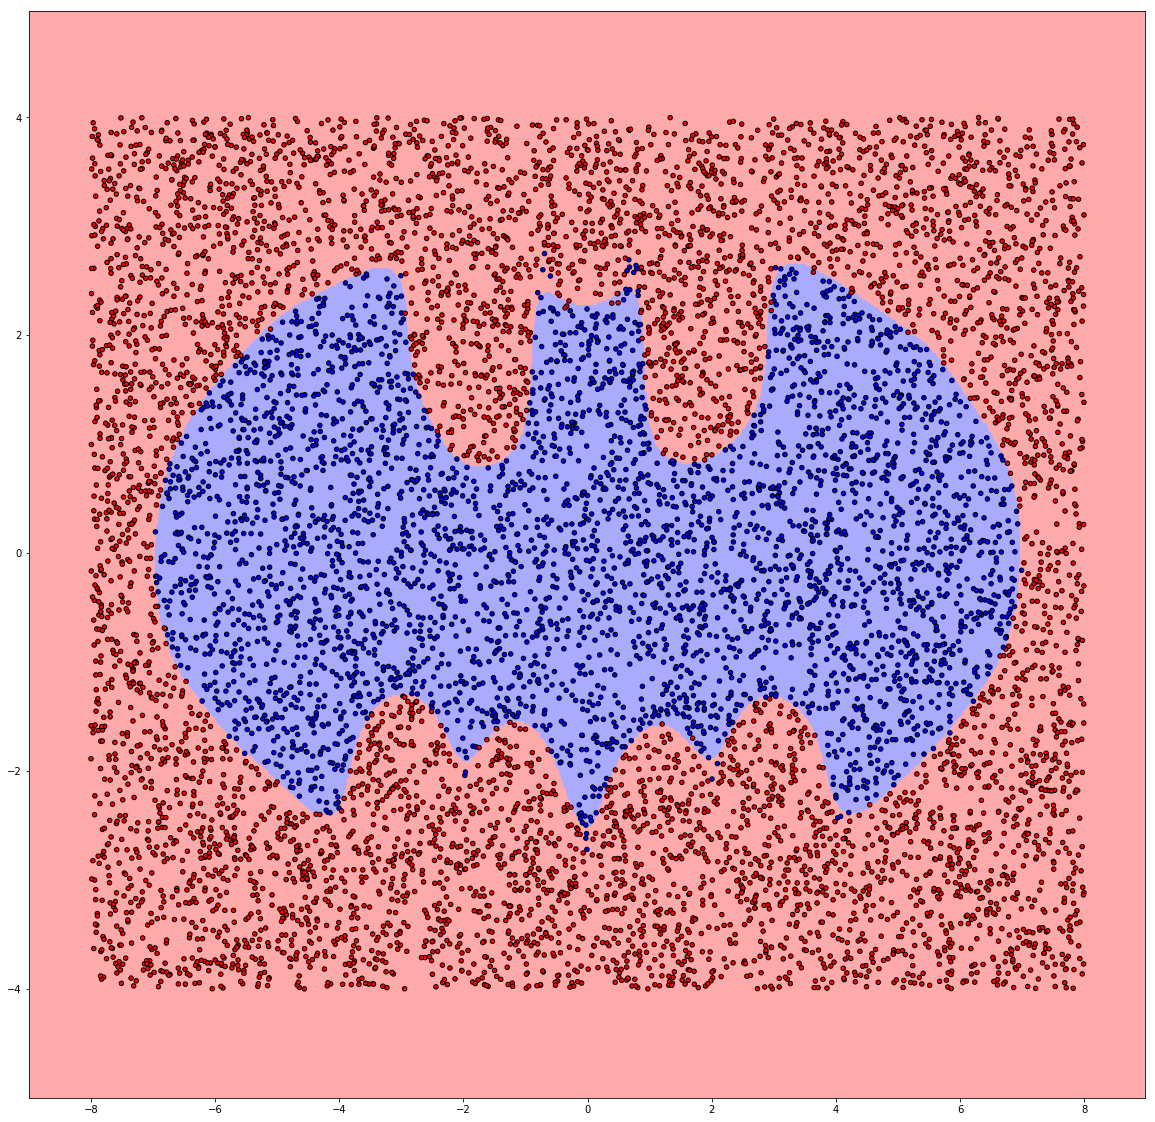

In [50]:
plt.figure(figsize=(20, 20))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
mCoordinates=np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mCoordinates)
Z = Z.reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

It seems Batman logo :)